# Multiple linear Regression

The general purpose of multiple regression is to learn more about the relationship between several independent or predictor variables and a dependent or criterion variable. 
 
 The Formula for Multiple Linear Regression Is

\begin{aligned} &y_i = \beta_0 + \beta _1 x_{i1} + \beta _2 x_{i2} + ... + \beta _p x_{ip} + \epsilon\\ &\textbf{where, for } i = n \textbf{ observations:}\\ &y_i=\text{dependent variable}\\ &x_i=\text{expanatory variables}\\ &\beta_0=\text{y-intercept (constant term)}\\ &\beta_p=\text{slope coefficients for each explanatory variable}\\ &\epsilon=\text{the model's error term (also known as the residuals)}\\ \end{aligned}  




In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split #split to training and test sets
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge

# Dropping non values and viewing our data frame

In [2]:
salary_data =  pd.read_csv("salary.csv").dropna()

In [3]:
salary_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


# Creating graphs(scatterplots and histograms) and descriptive statistics table

# 1. Plots

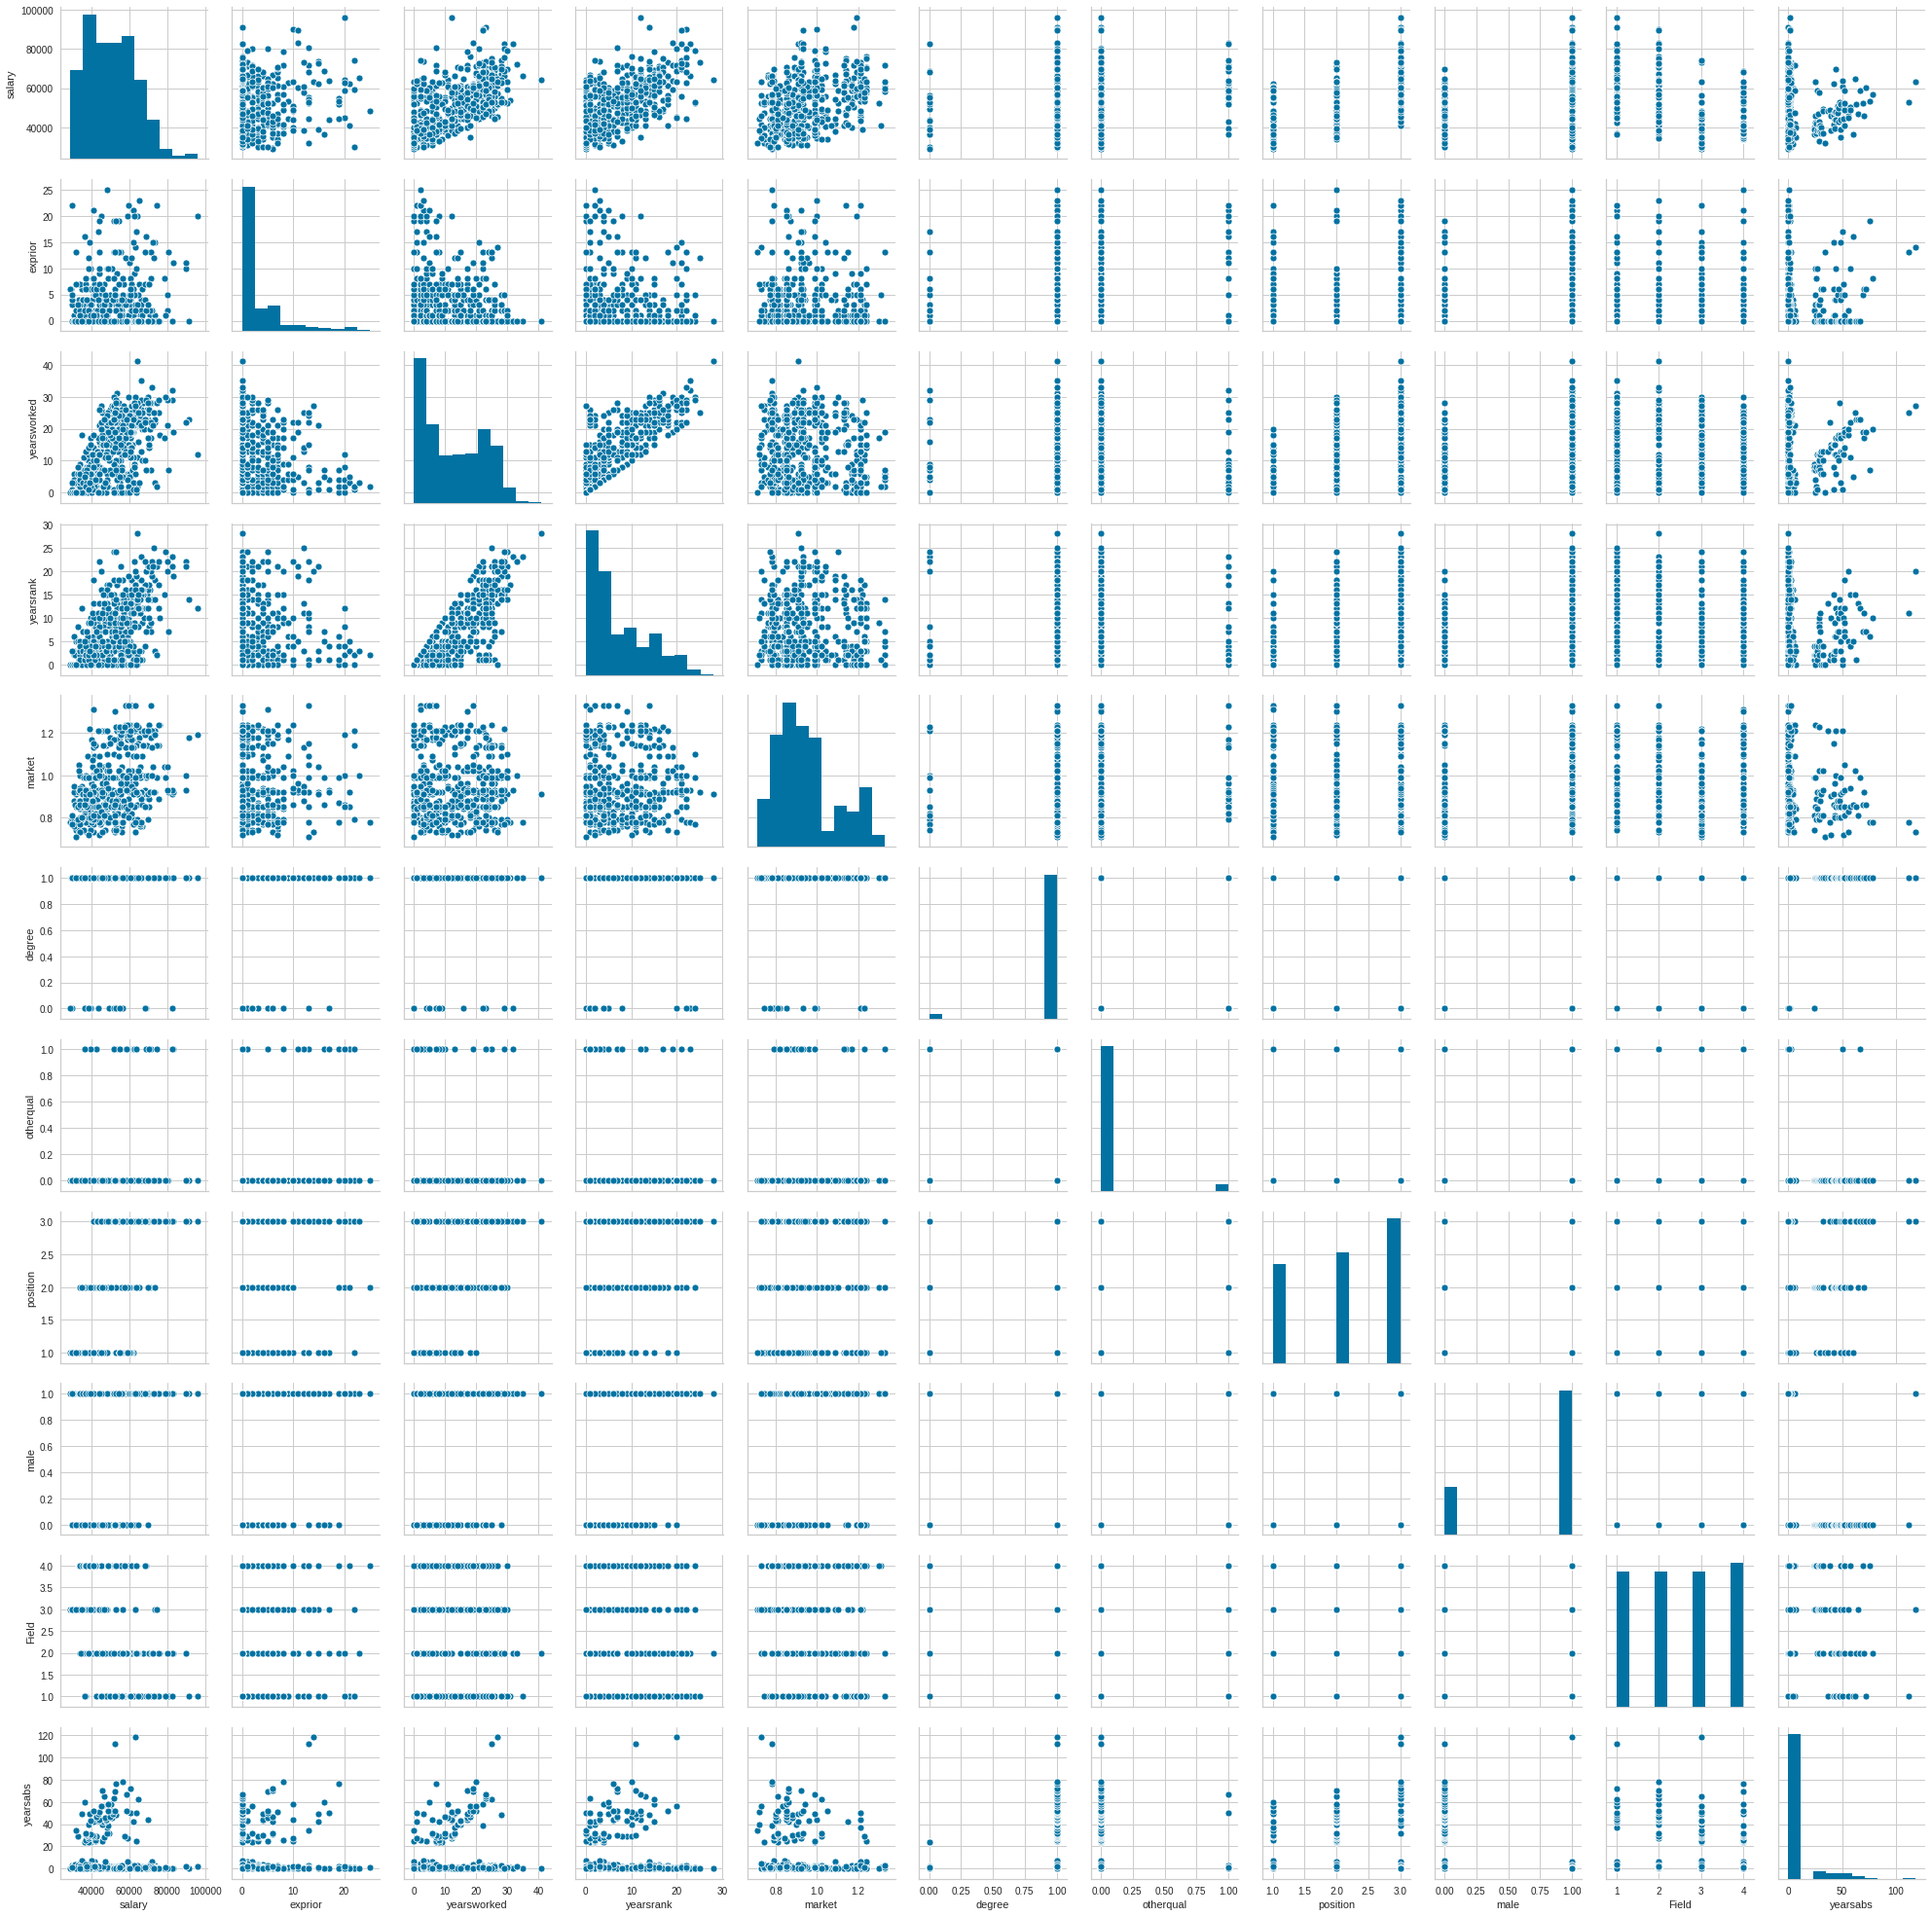

In [4]:
sns.pairplot(salary_data)

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

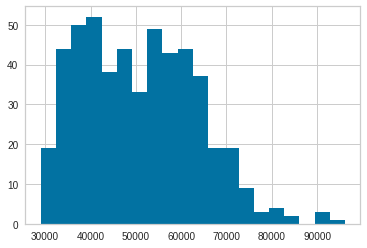

In [6]:
#Creating X and y
variables_cols = ['exprior', 'yearsworked', 'yearsrank', 'market', 'degree', 'otherqual', 'position', 'male', 'Field', 'yearsabs']
X = salary_data[variables_cols]
y = salary_data.salary

# Slit data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =1)

plt.hist(salary_data['salary'],data=X_train, bins=20)

plt.show()

# descriptive statistics table

In [7]:
salary_data.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


# creating dummy Variables

When creating dummy variableswe are creating new columns for our original dataset

In [8]:
# creating three dummy variables using get_dummies, then exclude the first dummy column
dummy = pd.get_dummies(salary_data['Field']).iloc[:, 1:]
dummy.head()

,2,3,4
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1


We've created a new dataframe. To compare it to our original dataframe we're going to concatenate them to work with them properly

In [9]:
df = pd.concat([salary_data,dummy],axis=1)
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,2,3,4
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,1


I chose to put my dummy variable on the right side of my dataframe so when I use pd.concat (the concatenation function) and put my dataframe first, and then the dummy variable I declared. As they are columns, I concatenate them on axis=1.

# Correlation Matrix heatmap

The correlation coefficient, or simply the correlation, is an index that ranges from -1 to 1. When the value is near zero, there is no linear relationship. As the correlation gets closer to plus or minus one, the relationship is stronger. A value of one (or negative one) indicates a perfect linear relationship between two variables.

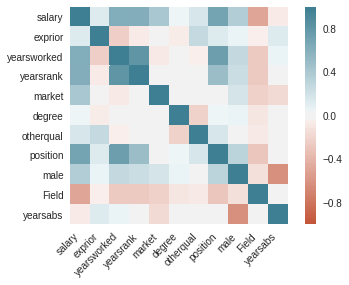

In [10]:
corr = salary_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The stronger the color,the larger the correlation magnitude.

There is a negative relationship between Salary and Field

Salary has the strongest relationship with itself

There is a small correlation magnitude between Salary and degree 

# Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

# 1 #creating a fitted model with all variables

In [11]:
lm1 = smf.ols(formula='salary ~ exprior + yearsworked + yearsrank + market + degree + otherqual + position + male + Field + yearsabs', data = salary_data).fit()
lm1.params

Intercept       4061.006038
exprior          165.129681
yearsworked     -115.202071
yearsrank        787.061611
market         31589.626426
degree           213.856152
otherqual       2509.894578
position        7856.035165
male             507.047369
Field          -1978.648362
yearsabs         -21.847066
dtype: float64

The market and position are the most important features when predicting employee salary

In [12]:
#Creating X and y
variables_cols = ['exprior', 'yearsworked', 'yearsrank', 'market', 'degree', 'otherqual', 'position', 'male', 'Field', 'yearsabs']
X = salary_data[variables_cols]
y = salary_data.salary

#instantiate and fit
lm2 = LinearRegression()
lm2.fit(X,y)

#print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

4061.006037773426
[ 1.65129681e+02 -1.15202071e+02  7.87061611e+02  3.15896264e+04
  2.13856152e+02  2.50989458e+03  7.85603517e+03  5.07047369e+02
 -1.97864836e+03 -2.18470660e+01]


# 2. Now we pair the feature names with their coefficients

In [13]:
list(zip(variables_cols, lm2.coef_))

[('exprior', 165.1296807453842),
 ('yearsworked', -115.202070997086),
 ('yearsrank', 787.0616105545433),
 ('market', 31589.626426497594),
 ('degree', 213.85615192053274),
 ('otherqual', 2509.8945779951305),
 ('position', 7856.035165247932),
 ('male', 507.0473690947591),
 ('Field', -1978.6483620806985),
 ('yearsabs', -21.847066019981156)]

# Our linear regression is given by:
y=β0+β1×exprior +β2×yearsworked +β3×yearsrank+...+β10xyearsabs

from the above equation we see that β is multiplied by a variable/feature and each variable/feature has its own coefficient, thus our linear regression will be in the form : 
# y=β0+165.13β1 -115.2β2 +787.06β3 + ... -21.85β10

# 3. Interpreting coefficients

The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.



A positive sign indicates that as the predictor variable increases, the response variable also increases.

A negative sign indicates that as the predictor variable increases, the response variable decreases.

# Statsmodels summary

In [14]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     211.9
Date:                Fri, 24 May 2019   Prob (F-statistic):          5.29e-173
Time:                        10:06:17   Log-Likelihood:                -5150.4
No. Observations:                 513   AIC:                         1.032e+04
Df Residuals:                     502   BIC:                         1.037e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4061.0060   2529.482      1.605      0.109    -908.670    9030.682
exprior       165.1297     72.632      2.274      0.023      22.430     307.829
yearsworked  -115.2021     85.699     -1.344      0.179    -283.575      53.171
yearsrank     787.0616     80.957      9.722      0.000     628.006     946.118
market       3.159e+04   1774.218     17.805      0.000    2.81e+04    3.51e+04
degree        213.8562   1402.297      0.153      0.879   -2541.238    2968.951
otherqual    2509.8946   1312.336      1.913      0.056     -68.453    5088.242
position     7856.0352    626.464     12.540      0.000    6625.221    9086.849
male          507.0474    856.991      0.592      0.554   -1176.684    2190.779
Field       -1978.6484    241.460     -8.195      0.000   -2453.046   -1504.251
yearsabs      -21.8471     21.009     -1.040      0.299     -63.123      19.429
==============================================================================
Omnibus:                       35.749   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.302
Skew:                           0.549   Prob(JB):                     1.97e-11
Kurtosis:                       4.050   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Points on what we get from the summary output

yearsworked,Field, and yearsabs are negatively associted with salary



R^2 equals 80%,this model provides a good fit for our data

# Calculating the standardised residuals and standardised predicted values

In [16]:
lm1.resid.head()

0    9338.138802
1    9983.085235
2     618.245318
3    -749.892156
4     -60.784158
dtype: float64

In [17]:
lm1.fittedvalues.head()

0    43661.861198
1    48016.914765
2    44881.754682
3    36531.892156
4    34791.784158
dtype: float64

# 1

# Plotting The Least Squares Line

/home/nomfundo/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


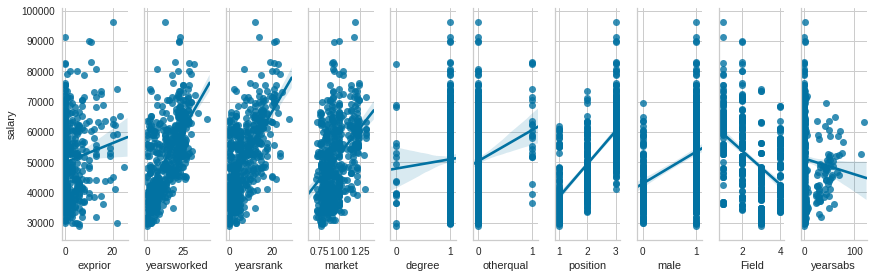

In [18]:
var1=['exprior', 'yearsworked', 'yearsrank', 'market','degree','otherqual', 'position', 'male','Field', 'yearsabs']
sns.pairplot(salary_data, x_vars=var1, y_vars='salary', size=4, aspect=0.3, kind='reg')


# Residuals Plot

Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), e.g. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

0.7407483100251564

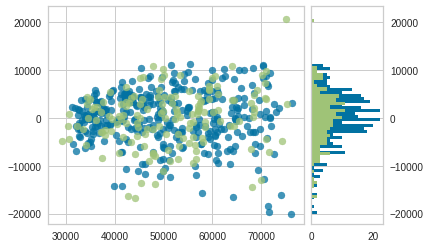

In [19]:
### SCIKIT-LEARN ###
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate. In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

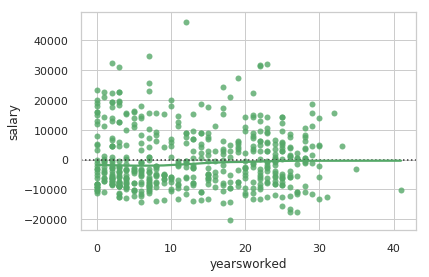

In [20]:
### SEABORN###
sns.set(style="whitegrid")
sns.residplot(x='yearsworked', y='salary' ,data=salary_data,  lowess=True, color="g")

# Model Evaluation Using Train/Test Split

In [30]:
# Slit data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =1)

#Instantiate model
lm2 =LinearRegression()

#Fit model
lm2.fit(X_train, y_train)

#Predict
y_pred = lm2.predict(X_test)

# what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

In [28]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5774.694169417974


# # Visualising The Prediction

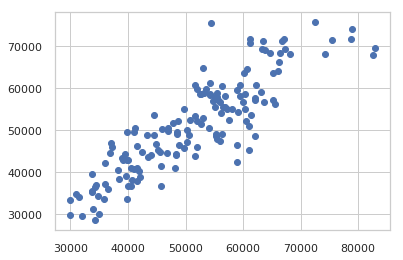

In [26]:
plt.scatter(y_test,y_pred)

There's a positive correlation thus our model will make a best fit for our data